In [30]:
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from pipeline import Dataset

In [38]:
dataset = Dataset.load('../../data/parsed')

In [56]:
df = dataset.market.copy()
df.set_index(['asset', 'day', 'timeslot'], inplace=True)
df[(df.index.get_level_values('asset') == 0) & (df.index.get_level_values('day') == 1)]

,,,open,close,high,low,volume,money
asset,day,timeslot,,,,,,
0,1,1,25.0164,24.9557,25.1378,24.9436,642243.0,1.610060e+07
1,1,1,16.3256,16.3499,16.4106,16.3256,15552.0,2.540301e+05
2,1,1,9.2006,9.1763,9.2006,9.1521,396647.0,3.638304e+06
3,1,1,9.1521,9.2006,9.2006,9.1521,317044.0,2.907092e+06
4,1,1,5.1829,5.1222,5.1829,5.1101,294784.0,1.514496e+06
...,...,...,...,...,...,...,...,...
49,1000,50,13.7524,13.7402,13.7524,13.7402,147800.0,2.030253e+06
50,1000,50,11.4340,11.4219,11.4340,11.4219,13000.0,1.484235e+05
51,1000,50,3.5200,3.5200,3.5200,3.5200,284775.0,1.002944e+06


<Figure size 2000x1000 with 0 Axes>

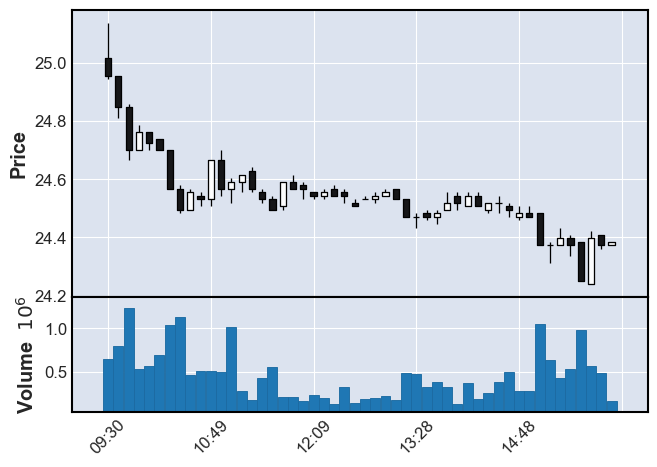

In [59]:
import pandas as pd
from pandas import DataFrame
import mplfinance as mpl
import matplotlib.pyplot as plt


def plot_price_volume(df: DataFrame, asset: int, day: int):
    """create a dataframe that takes index's asset and day equal to asset and day"""
    new_df = df[(df.index.get_level_values('asset') == asset) & (df.index.get_level_values('day') == day)]
    new_df = new_df[['open', 'high', 'low', 'close', 'volume']]
    new_df['datetime'] =  pd.date_range(start='9:30', end='16:00', periods=len(new_df))
    new_df = new_df.set_index('datetime')
    plt.figure(figsize=(20, 10))
    mpl.plot(new_df, type='candle', volume=True)
    plt.show()
    return None

plot_price_volume(df, asset=0, day=1)